# TS Forecasting with MLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.regularizers import l2
from keras import losses
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [2]:
data = pd.read_csv('zuerich-monthly-sunspot-numbers.csv')

In [3]:
data.head(10)

,Month,Sunspot
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


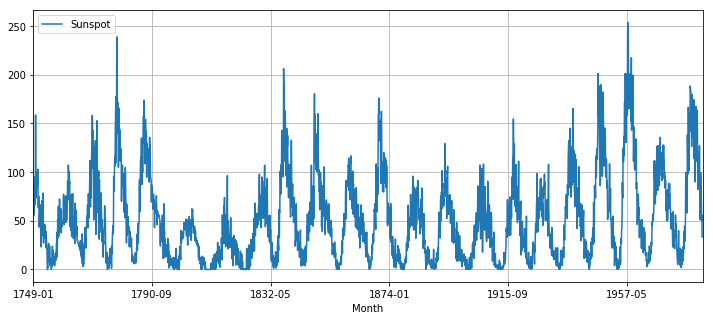

In [4]:
data.plot(x='Month', y='Sunspot', figsize=(12, 5))
plt.grid(True)

In [5]:
def to_normalize(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini) / (maxi - mini)

In [6]:
def organize_data(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
       
    return np.array(X), np.array(y)

In [7]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(X)*train_size)]
    y_test = y[int(len(X)*train_size):]
    return x_train, x_test, y_train, y_test

In [8]:
def MAPE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i])/y_test[i])*100
    media_erro = soma/len(y_test)
    return media_erro.round(5)

In [9]:
data.isnull()

,Month,Sunspot
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
data.isnull().sum()

Month      1
Sunspot    2
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

Month      0
Sunspot    0
dtype: int64

In [13]:
data = to_normalize(data['Sunspot'])
data = data + 1

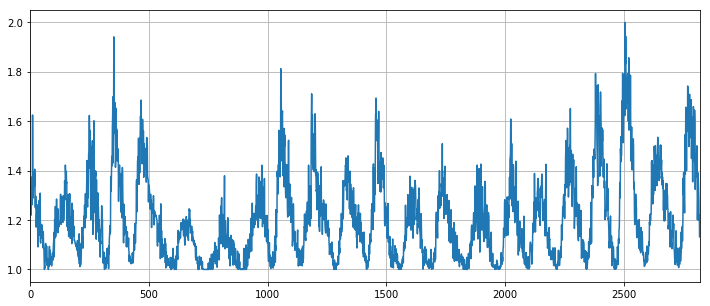

In [14]:
data.plot(x='Month', y='Sunspot', figsize=(12, 5))
plt.grid(True)

In [15]:
lag = 12

In [16]:
X, y = organize_data(data, lag)

In [17]:
X_train, X_test, y_train, y_test = split_data(X, y, train_size=0.3)

In [18]:
def network_model():
    model = Sequential()
    
    model.add(Dense(30, input_dim=lag, kernel_initializer='normal', activation='relu', activity_regularizer=l2(0.01)))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [19]:
mlp_regressor = KerasRegressor(build_fn=network_model, epochs=100, batch_size=10)

In [20]:
model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)

Train on 842 samples, validate on 1966 samples
Epoch 1/100
842/842 [==============================] - 0s 368us/step - loss: 0.3412 - acc: 0.0404 - val_loss: 0.1399 - val_acc: 0.0153
Epoch 2/100
842/842 [==============================] - 0s 181us/step - loss: 0.1190 - acc: 0.0439 - val_loss: 0.1147 - val_acc: 0.0158
Epoch 3/100
842/842 [==============================] - 0s 202us/step - loss: 0.0984 - acc: 0.0439 - val_loss: 0.0958 - val_acc: 0.0158
Epoch 4/100
842/842 [==============================] - 0s 184us/step - loss: 0.0829 - acc: 0.0439 - val_loss: 0.0816 - val_acc: 0.0158
Epoch 5/100
842/842 [==============================] - 0s 215us/step - loss: 0.0713 - acc: 0.0439 - val_loss: 0.0709 - val_acc: 0.0158
Epoch 6/100
842/842 [==============================] - 0s 185us/step - loss: 0.0624 - acc: 0.0439 - val_loss: 0.0626 - val_acc: 0.0158
Epoch 7/100
842/842 [==============================] - 0s 317us/step - loss: 0.0554 - acc: 0.0439 - val_loss: 0.0560 - val_acc: 0.0158
Epoch 8/

Epoch 61/100
842/842 [==============================] - 0s 193us/step - loss: 0.0076 - acc: 0.0439 - val_loss: 0.0076 - val_acc: 0.0158
Epoch 62/100
842/842 [==============================] - 0s 181us/step - loss: 0.0081 - acc: 0.0439 - val_loss: 0.0073 - val_acc: 0.0158
Epoch 63/100
842/842 [==============================] - 0s 193us/step - loss: 0.0068 - acc: 0.0439 - val_loss: 0.0073 - val_acc: 0.0158
Epoch 64/100
842/842 [==============================] - 0s 165us/step - loss: 0.0078 - acc: 0.0439 - val_loss: 0.0071 - val_acc: 0.0158
Epoch 65/100
842/842 [==============================] - 0s 183us/step - loss: 0.0069 - acc: 0.0439 - val_loss: 0.0080 - val_acc: 0.0158
Epoch 66/100
842/842 [==============================] - 0s 177us/step - loss: 0.0078 - acc: 0.0439 - val_loss: 0.0070 - val_acc: 0.0158
Epoch 67/100
842/842 [==============================] - 0s 179us/step - loss: 0.0070 - acc: 0.0439 - val_loss: 0.0069 - val_acc: 0.0158
Epoch 68/100
842/842 [==========================

In [21]:
pred = mlp_regressor.predict(X_test)

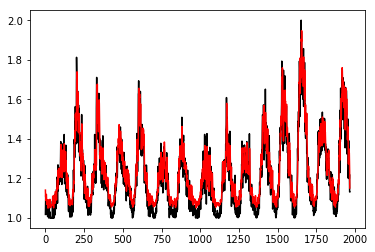

In [22]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')

In [23]:
MAPE(y_test, pred)

4.6493

In [24]:
def MAE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i]))
    media_erro = soma/len(y_test)
    return media_erro.round(5)

In [25]:
MAE(y_test, pred)

0.05641